In [1]:
import altair as alt
import pandas as pd
import numpy as np
from functools import reduce

In [2]:
DATA_FILE = './titanic_train.csv'
alt.renderers.enable('notebook')

df = pd.read_csv(DATA_FILE)
headers = list(df)
print(headers)

['Passenger_Id', 'Survived', 'Passenger_Class', 'Name', 'Sex', 'Age', 'Number_of_Siblings_or_Spouses', 'Number_of_Parents_or_Children', 'Ticket_Number', 'Passenger_Fare', 'Cabin', 'Port_of_Embarkation']


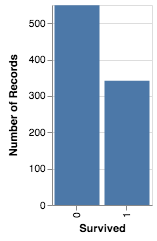

In [3]:
data = df[['Survived']]
alt.Chart(data).mark_bar().encode(
        x='Survived:N',
        y='count(Survived)'
    ).properties(
        width=100,
        height=200
    ).interactive()

In [4]:
target = 'Survived'
field_headers = ['Passenger_Class', 'Sex', 'Age', 'Number_of_Siblings_or_Spouses', 'Number_of_Parents_or_Children', 'Passenger_Fare', 'Port_of_Embarkation']

data = df[[*field_headers, target]]

def getCharts (field, width, height):
    def f(v):
        return alt.Chart(data).mark_bar().encode(
            x=field,
            y=alt.Y('count()', axis=alt.Axis(title=str(v))),
        ).transform_filter(
            alt.datum.Survived == v
        ).properties(
            width=width,
            height=height
        )
    return f(0)|f(1)

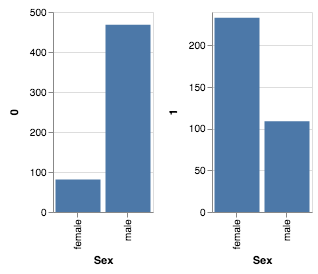

In [5]:
getCharts('Sex', 100, 200)

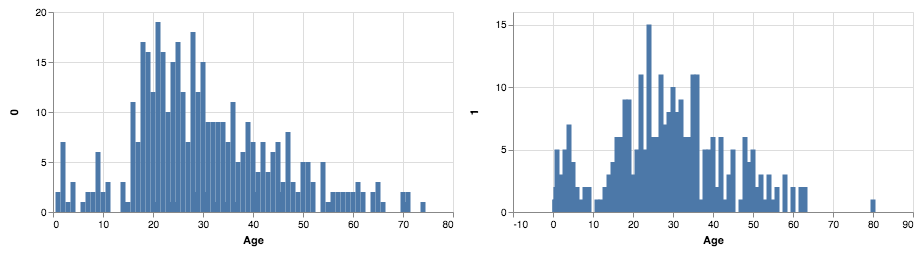

In [6]:
getCharts('Age', 400, 200)

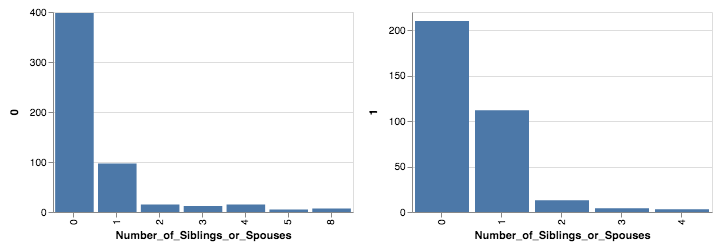

In [7]:
getCharts('Number_of_Siblings_or_Spouses:O', 300, 200)

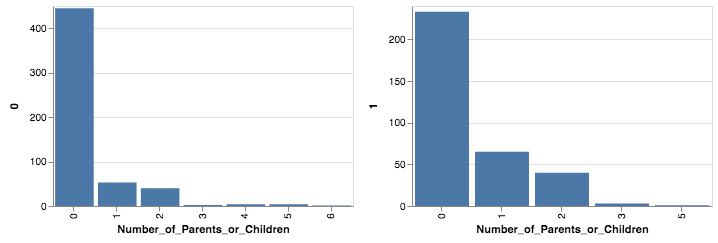

In [8]:
getCharts('Number_of_Parents_or_Children:O', 300, 200)

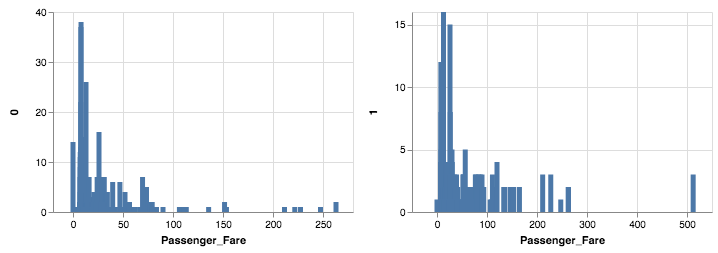

In [9]:
getCharts('Passenger_Fare', 300, 200)

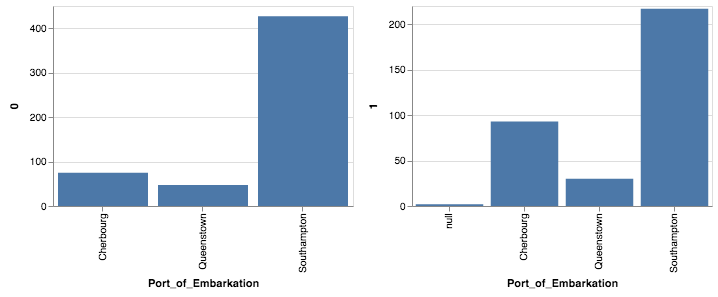

In [10]:
getCharts('Port_of_Embarkation', 300, 200)